# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import pdb
import numpy as np
from sklearn import datasets
from sklearn import preprocessing

In [144]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
#X= preprocessing.normalize(X)

#print(np.size(X))
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])
print(x_min)
print(x_max)
#rint(iris.data)
#print(y)
w=[0.5,0.7]
print(w)
print(w[0])
print(w[1])

inp=np.array([[0,0],
    [0,4],
    [3,0],
    [1,1]])
print(inp.shape)
print(inp[1,1])
print(inp[2:,:2])


300
4.3
7.9
[0.5, 0.7]
0.5
0.7
(4, 2)
4
[[3 0]
 [1 1]]


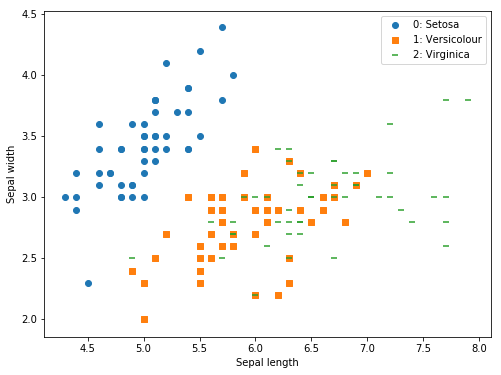

In [145]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

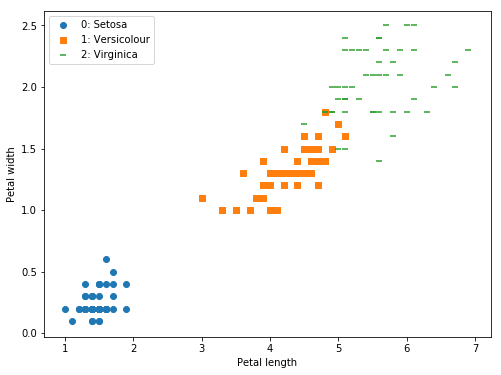

In [146]:
# Plot the data points. Petal points
def make_plot2():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(iris.data[:, 2][y==cat], iris.data[:, 3][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot2()

## Set up dataset for training a Setosa/not-Setosa classifier

In [147]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [148]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [149]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

In [152]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._w = [0, 0]
        self._b = 0
        
    
    def predict(self, x, verbose=True):
        """x is the input weight vector. Output is the result of running the perceptron on this input.
        
        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.
        
        The returned output should be 1 or 0.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        # TODO
        retVal=0
        z=self._b + self._w[0]*x[0]+ self._w[1]*x[1]
        #z=self._b + np.inner(self._w,x)
        thres=0.0
        if z>thres:
            retVal=1
        else: #z<=thres
            retVal=0
        
        if verbose:
            # Print computation results here if desired.
            print("input x1, x2=",x[0],",",x[1], "weights w0,w1=",self._w[0],",",self._w[1], "z=",z,"retVal=",retVal)
        # End TODO
        return retVal
        
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)
            
    def update_weights(self, x, target, verbose=True):
        """Update the perceptron's weights according to the perceptron learning rule.
        
        x is an input example, and target is the desired output.
        
        This function should modify self._b and self._w. It has no return value.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        current_output = self.predict(x)
        rate=0.1
        # TODO
        upd_w0 = self._w[0] + (target-current_output)*x[0]*rate
        upd_w1 = self._w[1] + (target-current_output)*x[1]*rate
        
        upd_b  = self._b + (target-current_output)*rate
        
        if verbose:
            #print("NP Multiply,upd_w,upd_w0, upd_w1,upd_b",upd_w,upd_w0,upd_w1,upd_b)
            print("Input-> x0,x1,w0,w1,bias,current_output,target",x[0],",",x[1],",",self._w[0],",",self._w[1],",",self._b,",",current_output,target)
            print("Output-> w0,w1,bias",upd_w0,",",upd_w1,",",upd_b)
        self._w[0]=upd_w0
        self._w[1]=upd_w1
        self._b=upd_b
        #End TODO
        
    def train(self, x, y, num_iterations, verbose=True):
        """Train the perceptron for the given number of iterations on the input data x with 
        corresponding target values y.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)):
                example_x = x[j]
                example_y = y[j]

                # Train the perceptron on this input/output example pair (example_x, example_y).
                # This should update the perceptron's weights.
                
                # TODO
                self.update_weights(example_x, example_y,True)
                
                if verbose:
                    pass
                    # TODO
                #End TODO   
            # Print some useful info during training.
            print('Weights:', self._w)
            print('Bias:', self._b)  
            acc = self.accuracy(x, y)
            print('Accuracy: %.3f%%' % (acc * 100))
            print()
            

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [153]:
p = Perceptron()

# TODO: Train.
p.train(X_shuffled, y_shuffled, 50, True)
#End TODO

Iter #0
input x1, x2= 6.3 , 3.3 weights w0,w1= 0 , 0 z= 0.0 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 0 , 0 , 0 , 0 1
Output-> w0,w1,bias 0.63 , 0.33 , 0.1
input x1, x2= 5.6 , 2.7 weights w0,w1= 0.63 , 0.33 z= 4.519 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.7 , 0.63 , 0.33 , 0.1 , 1 1
Output-> w0,w1,bias 0.63 , 0.33 , 0.1
input x1, x2= 5.4 , 3.9 weights w0,w1= 0.63 , 0.33 z= 4.789 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 0.63 , 0.33 , 0.1 , 1 0
Output-> w0,w1,bias 0.08999999999999997 , -0.06 , 0.0
input x1, x2= 6.8 , 2.8 weights w0,w1= 0.08999999999999997 , -0.06 z= 0.4439999999999998 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 2.8 , 0.08999999999999997 , -0.06 , 0.0 , 1 1
Output-> w0,w1,bias 0.08999999999999997 , -0.06 , 0.0
input x1, x2= 5.6 , 2.8 weights w0,w1= 0.08999999999999997 , -0.06 z= 0.3359999999999998 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.8 , 0.0899999

input x1, x2= 5.4 , 3.7 weights w0,w1= 0.7300000000000002 , -1.3900000000000003 z= -1.4010000000000002 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.7 , 0.7300000000000002 , -1.3900000000000003 , -0.2 , 0 0
Output-> w0,w1,bias 0.7300000000000002 , -1.3900000000000003 , -0.2
input x1, x2= 6.7 , 3.1 weights w0,w1= 0.7300000000000002 , -1.3900000000000003 z= 0.38200000000000056 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.1 , 0.7300000000000002 , -1.3900000000000003 , -0.2 , 1 1
Output-> w0,w1,bias 0.7300000000000002 , -1.3900000000000003 , -0.2
input x1, x2= 7.3 , 2.9 weights w0,w1= 0.7300000000000002 , -1.3900000000000003 z= 1.0980000000000008 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.3 , 2.9 , 0.7300000000000002 , -1.3900000000000003 , -0.2 , 1 1
Output-> w0,w1,bias 0.7300000000000002 , -1.3900000000000003 , -0.2
input x1, x2= 6.0 , 2.2 weights w0,w1= 0.7300000000000002 , -1.3900000000000003 z= 1.1219999999999994 retVal= 1
Input->

input x1, x2= 5.0 , 3.0 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -0.4900000000000011 retVal= 0
input x1, x2= 6.7 , 3.3 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 0.4769999999999994 retVal= 1
input x1, x2= 5.4 , 3.9 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -1.4900000000000002 retVal= 0
input x1, x2= 7.2 , 3.2 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 1.0399999999999991 retVal= 1
input x1, x2= 5.3 , 3.7 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -1.277000000000002 retVal= 0
input x1, x2= 6.3 , 2.5 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 1.3289999999999988 retVal= 1
input x1, x2= 5.5 , 4.2 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -1.8510000000000018 retVal= 0
input x1, x2= 6.9 , 3.1 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 0.9389999999999992 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -1.248000000000001

input x1, x2= 5.7 , 2.9 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 0.23899999999999988 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 2.9 , 0.8300000000000001 , -1.4800000000000004 , -0.2 , 1 1
Output-> w0,w1,bias 0.8300000000000001 , -1.4800000000000004 , -0.2
input x1, x2= 6.0 , 2.9 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= 0.48799999999999955 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.9 , 0.8300000000000001 , -1.4800000000000004 , -0.2 , 1 1
Output-> w0,w1,bias 0.8300000000000001 , -1.4800000000000004 , -0.2
input x1, x2= 6.0 , 3.4 weights w0,w1= 0.8300000000000001 , -1.4800000000000004 z= -0.25200000000000067 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 3.4 , 0.8300000000000001 , -1.4800000000000004 , -0.2 , 0 1
Output-> w0,w1,bias 1.4300000000000002 , -1.1400000000000003 , -0.1
input x1, x2= 6.7 , 2.5 weights w0,w1= 1.4300000000000002 , -1.1400000000000003 z= 6.631 retVal= 1
Input-> x0,x1,w0,w

input x1, x2= 5.4 , 3.4 weights w0,w1= 1.0900000000000005 , -1.8900000000000003 z= -0.8399999999999981 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.4 , 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004 , 0 0
Output-> w0,w1,bias 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004
input x1, x2= 7.6 , 3.0 weights w0,w1= 1.0900000000000005 , -1.8900000000000003 z= 2.3140000000000036 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.6 , 3.0 , 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004 , 1 1
Output-> w0,w1,bias 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004
input x1, x2= 6.5 , 2.8 weights w0,w1= 1.0900000000000005 , -1.8900000000000003 z= 1.493000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 2.8 , 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004 , 1 1
Output-> w0,w1,bias 1.0900000000000005 , -1.8900000000000003 , -0.30000000000000004
input x1, x2= 5.8 , 4.0 w

input x1, x2= 5.6 , 2.9 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 0.259000000000003 retVal= 1
input x1, x2= 6.5 , 3.2 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 0.6760000000000028 retVal= 1
input x1, x2= 4.9 , 2.5 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 0.26300000000000257 retVal= 1
input x1, x2= 5.9 , 3.2 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 0.004000000000002224 retVal= 1
input x1, x2= 6.5 , 3.0 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 1.0700000000000038 retVal= 1
input x1, x2= 4.9 , 3.0 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= -0.7219999999999969 retVal= 0
input x1, x2= 7.7 , 3.0 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 2.4140000000000033 retVal= 1
input x1, x2= 6.8 , 3.0 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 1.4060000000000032 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 1.1200000000000006 , -1.9700000000000002 z= 0.8770000000000024

Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 2.5 , 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004 , 1 1
Output-> w0,w1,bias 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004
input x1, x2= 6.2 , 3.4 weights w0,w1= 1.2800000000000007 , -1.9300000000000002 z= 1.0740000000000043 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 3.4 , 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004 , 1 1
Output-> w0,w1,bias 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004
input x1, x2= 6.0 , 2.7 weights w0,w1= 1.2800000000000007 , -1.9300000000000002 z= 2.169000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.7 , 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004 , 1 1
Output-> w0,w1,bias 1.2800000000000007 , -1.9300000000000002 , -0.30000000000000004
input x1, x2= 4.9 , 3.6 weights w0,w1= 1.2800000000000007 , -1.9300000000000002 z= -0.9759999999999964 retVal= 0
Input-> x0,x1,w0,w1,bias,

input x1, x2= 5.1 , 3.8 weights w0,w1= 1.450000000000001 , -2.7700000000000005 z= -3.6309999999999967 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.8 , 1.450000000000001 , -2.7700000000000005 , -0.5 , 0 0
Output-> w0,w1,bias 1.450000000000001 , -2.7700000000000005 , -0.5
input x1, x2= 6.4 , 2.8 weights w0,w1= 1.450000000000001 , -2.7700000000000005 z= 1.0240000000000054 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.8 , 1.450000000000001 , -2.7700000000000005 , -0.5 , 1 1
Output-> w0,w1,bias 1.450000000000001 , -2.7700000000000005 , -0.5
input x1, x2= 6.4 , 2.9 weights w0,w1= 1.450000000000001 , -2.7700000000000005 z= 0.7470000000000052 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.9 , 1.450000000000001 , -2.7700000000000005 , -0.5 , 1 1
Output-> w0,w1,bias 1.450000000000001 , -2.7700000000000005 , -0.5
input x1, x2= 4.6 , 3.4 weights w0,w1= 1.450000000000001 , -2.7700000000000005 z= -3.2479999999999967 retVal= 0
Input-> x0,x1,w0,

input x1, x2= 6.5 , 2.8 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= 1.6690000000000023 retVal= 1
input x1, x2= 5.8 , 4.0 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= -2.8739999999999988 retVal= 0
input x1, x2= 5.7 , 3.8 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= -2.456999999999999 retVal= 0
input x1, x2= 6.9 , 3.2 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= 1.1490000000000045 retVal= 1
input x1, x2= 5.5 , 2.4 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= 1.2470000000000026 retVal= 1
input x1, x2= 5.4 , 3.4 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= -1.7799999999999976 retVal= 0
input x1, x2= 4.9 , 3.1 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= -1.7039999999999988 retVal= 0
input x1, x2= 6.3 , 2.3 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= 2.7900000000000036 retVal= 1
input x1, x2= 5.5 , 2.4 weights w0,w1= 1.570000000000001 , -2.870000000000001 z= 1.2470000000000026 retVal= 1
input x

input x1, x2= 4.9 , 3.6 weights w0,w1= 1.8200000000000012 , -2.8900000000000015 z= -1.9859999999999989 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.6 , 1.8200000000000012 , -2.8900000000000015 , -0.5 , 0 0
Output-> w0,w1,bias 1.8200000000000012 , -2.8900000000000015 , -0.5
input x1, x2= 6.6 , 2.9 weights w0,w1= 1.8200000000000012 , -2.8900000000000015 z= 3.131000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 2.9 , 1.8200000000000012 , -2.8900000000000015 , -0.5 , 1 1
Output-> w0,w1,bias 1.8200000000000012 , -2.8900000000000015 , -0.5
input x1, x2= 7.7 , 3.8 weights w0,w1= 1.8200000000000012 , -2.8900000000000015 z= 2.5320000000000054 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 3.8 , 1.8200000000000012 , -2.8900000000000015 , -0.5 , 1 1
Output-> w0,w1,bias 1.8200000000000012 , -2.8900000000000015 , -0.5
input x1, x2= 6.1 , 2.8 weights w0,w1= 1.8200000000000012 , -2.8900000000000015 z= 2.5100000000000016 retVal= 1
Input-> x

Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.8 , 1.7900000000000016 , -3.2100000000000017 , -0.6 , 1 1
Output-> w0,w1,bias 1.7900000000000016 , -3.2100000000000017 , -0.6
input x1, x2= 6.4 , 2.9 weights w0,w1= 1.7900000000000016 , -3.2100000000000017 z= 1.547000000000006 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.9 , 1.7900000000000016 , -3.2100000000000017 , -0.6 , 1 1
Output-> w0,w1,bias 1.7900000000000016 , -3.2100000000000017 , -0.6
input x1, x2= 4.6 , 3.4 weights w0,w1= 1.7900000000000016 , -3.2100000000000017 z= -3.2799999999999976 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.4 , 1.7900000000000016 , -3.2100000000000017 , -0.6 , 0 0
Output-> w0,w1,bias 1.7900000000000016 , -3.2100000000000017 , -0.6
input x1, x2= 5.5 , 2.3 weights w0,w1= 1.7900000000000016 , -3.2100000000000017 z= 1.8620000000000063 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.3 , 1.7900000000000016 , -3.2100000000000017 , -0.6 , 1 1
Output->

input x1, x2= 6.1 , 3.0 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= 1.121000000000004 retVal= 1
input x1, x2= 4.7 , 3.2 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= -2.214999999999998 retVal= 0
input x1, x2= 5.6 , 3.0 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= 0.16600000000000215 retVal= 1
input x1, x2= 4.7 , 3.2 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= -2.214999999999998 retVal= 0
input x1, x2= 6.3 , 2.7 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= 2.496000000000004 retVal= 1
input x1, x2= 5.4 , 3.0 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= -0.21599999999999575 retVal= 0
input x1, x2= 5.1 , 3.8 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= -3.4369999999999994 retVal= 0
Accuracy: 97.333%

Iter #4
input x1, x2= 6.3 , 3.3 weights w0,w1= 1.9100000000000017 , -3.3100000000000023 z= 0.5100000000000033 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 1.91000000000000

input x1, x2= 6.1 , 3.0 weights w0,w1= 2.0700000000000016 , -3.2700000000000022 z= 2.217000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 3.0 , 2.0700000000000016 , -3.2700000000000022 , -0.6 , 1 1
Output-> w0,w1,bias 2.0700000000000016 , -3.2700000000000022 , -0.6
input x1, x2= 5.1 , 3.5 weights w0,w1= 2.0700000000000016 , -3.2700000000000022 z= -1.4879999999999995 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.5 , 2.0700000000000016 , -3.2700000000000022 , -0.6 , 0 0
Output-> w0,w1,bias 2.0700000000000016 , -3.2700000000000022 , -0.6
input x1, x2= 5.0 , 3.0 weights w0,w1= 2.0700000000000016 , -3.2700000000000022 z= -0.059999999999996945 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.0 , 2.0700000000000016 , -3.2700000000000022 , -0.6 , 0 0
Output-> w0,w1,bias 2.0700000000000016 , -3.2700000000000022 , -0.6
input x1, x2= 6.7 , 3.3 weights w0,w1= 2.0700000000000016 , -3.2700000000000022 z= 2.4780000000000033 retVal= 1
Input-

input x1, x2= 6.8 , 3.2 weights w0,w1= 2.0400000000000014 , -3.5900000000000025 z= 1.684000000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 3.2 , 2.0400000000000014 , -3.5900000000000025 , -0.7 , 1 1
Output-> w0,w1,bias 2.0400000000000014 , -3.5900000000000025 , -0.7
input x1, x2= 4.3 , 3.0 weights w0,w1= 2.0400000000000014 , -3.5900000000000025 z= -2.6980000000000004 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.3 , 3.0 , 2.0400000000000014 , -3.5900000000000025 , -0.7 , 0 0
Output-> w0,w1,bias 2.0400000000000014 , -3.5900000000000025 , -0.7
input x1, x2= 6.7 , 3.3 weights w0,w1= 2.0400000000000014 , -3.5900000000000025 z= 1.1210000000000022 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.3 , 2.0400000000000014 , -3.5900000000000025 , -0.7 , 1 1
Output-> w0,w1,bias 2.0400000000000014 , -3.5900000000000025 , -0.7
input x1, x2= 6.1 , 2.9 weights w0,w1= 2.0400000000000014 , -3.5900000000000025 z= 1.333000000000002 retVal= 1
Input-> x0

Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.5 , 2.160000000000001 , -3.690000000000003 , -0.7 , 1 1
Output-> w0,w1,bias 2.160000000000001 , -3.690000000000003 , -0.7
input x1, x2= 7.7 , 2.6 weights w0,w1= 2.160000000000001 , -3.690000000000003 z= 6.338000000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.6 , 2.160000000000001 , -3.690000000000003 , -0.7 , 1 1
Output-> w0,w1,bias 2.160000000000001 , -3.690000000000003 , -0.7
input x1, x2= 6.2 , 2.2 weights w0,w1= 2.160000000000001 , -3.690000000000003 z= 4.574 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.2 , 2.160000000000001 , -3.690000000000003 , -0.7 , 1 1
Output-> w0,w1,bias 2.160000000000001 , -3.690000000000003 , -0.7
input x1, x2= 4.9 , 2.4 weights w0,w1= 2.160000000000001 , -3.690000000000003 z= 1.0279999999999987 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 2.4 , 2.160000000000001 , -3.690000000000003 , -0.7 , 1 1
Output-> w0,w1,bias 2.160000000000001 , -3

Output-> w0,w1,bias 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999
input x1, x2= 7.3 , 2.9 weights w0,w1= 2.0900000000000016 , -3.9300000000000033 z= 3.0600000000000023 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.3 , 2.9 , 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999 , 1 1
Output-> w0,w1,bias 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999
input x1, x2= 6.0 , 2.2 weights w0,w1= 2.0900000000000016 , -3.9300000000000033 z= 3.094000000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999 , 1 1
Output-> w0,w1,bias 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999
input x1, x2= 7.7 , 2.8 weights w0,w1= 2.0900000000000016 , -3.9300000000000033 z= 4.289000000000005 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.8 , 2.0900000000000016 , -3.9300000000000033 , -0.7999999999999999 , 1 1
Output-> w0,w1,bias 2.09000000000

input x1, x2= 5.8 , 2.7 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= 1.9759999999999973 retVal= 1
input x1, x2= 5.1 , 3.3 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -2.081000000000003 retVal= 0
input x1, x2= 5.7 , 4.4 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -5.093000000000009 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -3.1200000000000045 retVal= 0
input x1, x2= 7.4 , 2.8 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= 5.334000000000003 retVal= 1
input x1, x2= 5.0 , 3.6 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -3.5220000000000056 retVal= 0
input x1, x2= 5.0 , 2.3 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= 1.7040000000000006 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= 1.004999999999999 retVal= 1
input x1, x2= 5.2 , 4.1 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -5.062000000000003 retVal= 0
i

Output-> w0,w1,bias 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999
input x1, x2= 5.1 , 3.7 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -3.689000000000007 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.7 , 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999 , 0 0
Output-> w0,w1,bias 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999
input x1, x2= 6.3 , 2.8 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= 2.7490000000000006 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.8 , 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999 , 1 1
Output-> w0,w1,bias 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999
input x1, x2= 4.9 , 3.1 weights w0,w1= 2.3500000000000014 , -4.020000000000003 z= -1.7470000000000034 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.1 , 2.3500000000000014 , -4.020000000000003 , -0.7999999999999999 , 0 0
Output-> w0,w1,bias 2.3500000000000014 

Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999 , 0 0
Output-> w0,w1,bias 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999
input x1, x2= 7.0 , 3.2 weights w0,w1= 2.2800000000000016 , -4.2600000000000025 z= 1.4280000000000026 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.0 , 3.2 , 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999 , 1 1
Output-> w0,w1,bias 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999
input x1, x2= 5.2 , 3.4 weights w0,w1= 2.2800000000000016 , -4.2600000000000025 z= -3.5279999999999987 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 3.4 , 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999 , 0 0
Output-> w0,w1,bias 2.2800000000000016 , -4.2600000000000025 , -0.8999999999999999
input x1, x2= 5.6 , 2.9 weights w0,w1= 2.2800000000000016 , -4.2600000000000025 z= -0.4859999999999989 retVal= 0
Input-> x0,x1,w0,w1,bias,curr

input x1, x2= 5.5 , 4.2 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= -0.8120000000000012 retVal= 0
input x1, x2= 6.9 , 3.1 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 7.883000000000003 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 0.2539999999999978 retVal= 1
input x1, x2= 5.0 , 3.5 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 0.4649999999999981 retVal= 1
input x1, x2= 7.2 , 3.6 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 6.796000000000001 retVal= 1
input x1, x2= 4.5 , 2.3 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 3.7470000000000017 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 5.952000000000002 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 6.121 retVal= 1
input x1, x2= 6.1 , 2.6 weights w0,w1= 3.0600000000000014 , -4.0100000000000025 z= 7.4399999999999995 retVal= 1
input x

input x1, x2= 5.7 , 3.0 weights w0,w1= 2.6800000000000015 , -4.360000000000002 z= 1.296000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 3.0 , 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999 , 1 1
Output-> w0,w1,bias 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999
input x1, x2= 5.0 , 3.4 weights w0,w1= 2.6800000000000015 , -4.360000000000002 z= -2.324 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999 , 0 0
Output-> w0,w1,bias 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999
input x1, x2= 6.7 , 3.0 weights w0,w1= 2.6800000000000015 , -4.360000000000002 z= 3.976000000000006 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.0 , 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999 , 1 1
Output-> w0,w1,bias 2.6800000000000015 , -4.360000000000002 , -0.8999999999999999
input x1, x2= 5.8 , 2.7 weights w0,w1= 2.6800000000000

input x1, x2= 5.2 , 3.5 weights w0,w1= 2.5800000000000014 , -4.590000000000002 z= -3.6489999999999974 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 3.5 , 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999 , 0 0
Output-> w0,w1,bias 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999
input x1, x2= 5.6 , 2.5 weights w0,w1= 2.5800000000000014 , -4.590000000000002 z= 1.9730000000000025 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.5 , 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999 , 1 1
Output-> w0,w1,bias 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999
input x1, x2= 6.3 , 3.3 weights w0,w1= 2.5800000000000014 , -4.590000000000002 z= 0.10700000000000465 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999 , 1 1
Output-> w0,w1,bias 2.5800000000000014 , -4.590000000000002 , -0.9999999999999999
input x1, x2= 6.7 , 3.1 weights w0,w1=

input x1, x2= 5.5 , 4.2 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= -1.3470000000000013 retVal= 0
input x1, x2= 6.9 , 3.1 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 7.888000000000005 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= -0.14600000000000257 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 0.0649999999999995 retVal= 1
input x1, x2= 7.2 , 3.6 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 6.6960000000000015 retVal= 1
input x1, x2= 4.5 , 2.3 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 3.6320000000000014 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 5.852000000000004 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 6.0809999999999995 retVal= 1
input x1, x2= 6.1 , 2.6 weights w0,w1= 3.2100000000000013 , -4.310000000000002 z= 7.475000000000001 retVal= 1
i

Output-> w0,w1,bias 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999
input x1, x2= 5.0 , 3.4 weights w0,w1= 2.8700000000000014 , -4.5900000000000025 z= -2.256000000000002 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999 , 0 0
Output-> w0,w1,bias 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999
input x1, x2= 6.7 , 3.0 weights w0,w1= 2.8700000000000014 , -4.5900000000000025 z= 4.459000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.0 , 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999 , 1 1
Output-> w0,w1,bias 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999
input x1, x2= 5.8 , 2.7 weights w0,w1= 2.8700000000000014 , -4.5900000000000025 z= 3.253 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 2.8700000000000014 , -4.5900000000000025 , -0.9999999999999999 , 1 1
Output-> w0,w1,bias 2.8700000000000014 , -4.5

input x1, x2= 5.6 , 2.5 weights w0,w1= 2.8000000000000016 , -4.790000000000002 z= 2.605000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.5 , 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999
input x1, x2= 6.3 , 3.3 weights w0,w1= 2.8000000000000016 , -4.790000000000002 z= 0.7330000000000041 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999
input x1, x2= 6.7 , 3.1 weights w0,w1= 2.8000000000000016 , -4.790000000000002 z= 2.8110000000000053 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.1 , 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 2.8000000000000016 , -4.790000000000002 , -1.0999999999999999
input x1, x2= 5.5 , 3.5 weights w0,w1= 2.

input x1, x2= 5.8 , 2.7 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 6.249000000000004 retVal= 1
input x1, x2= 6.1 , 2.6 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 7.700000000000005 retVal= 1
input x1, x2= 6.1 , 2.8 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 6.802000000000005 retVal= 1
input x1, x2= 6.0 , 2.2 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 9.162000000000004 retVal= 1
input x1, x2= 4.8 , 3.0 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 1.5620000000000012 retVal= 1
input x1, x2= 6.0 , 3.0 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 5.570000000000004 retVal= 1
input x1, x2= 5.4 , 3.7 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 0.4230000000000018 retVal= 1
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 7.459000000000005 retVal= 1
input x1, x2= 7.3 , 2.9 weights w0,w1= 3.3400000000000016 , -4.490000000000002 z= 10.361000000000006 retVal= 1
input x

Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.8 , 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999
input x1, x2= 6.2 , 2.8 weights w0,w1= 3.0000000000000018 , -4.770000000000002 z= 4.1440000000000055 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.8 , 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999
input x1, x2= 6.3 , 2.5 weights w0,w1= 3.0000000000000018 , -4.770000000000002 z= 5.875000000000002 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.5 , 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999 , 1 1
Output-> w0,w1,bias 3.0000000000000018 , -4.770000000000002 , -1.0999999999999999
input x1, x2= 5.2 , 2.7 weights w0,w1= 3.0000000000000018 , -4.770000000000002 z= 1.621000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,ta

input x1, x2= 5.0 , 3.4 weights w0,w1= 2.7100000000000017 , -4.980000000000001 z= -4.581999999999997 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 2.7100000000000017 , -4.980000000000001 , -1.2 , 0 0
Output-> w0,w1,bias 2.7100000000000017 , -4.980000000000001 , -1.2
input x1, x2= 7.0 , 3.2 weights w0,w1= 2.7100000000000017 , -4.980000000000001 z= 1.8340000000000085 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.0 , 3.2 , 2.7100000000000017 , -4.980000000000001 , -1.2 , 1 1
Output-> w0,w1,bias 2.7100000000000017 , -4.980000000000001 , -1.2
input x1, x2= 5.2 , 3.4 weights w0,w1= 2.7100000000000017 , -4.980000000000001 z= -4.039999999999996 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 3.4 , 2.7100000000000017 , -4.980000000000001 , -1.2 , 0 0
Output-> w0,w1,bias 2.7100000000000017 , -4.980000000000001 , -1.2
input x1, x2= 5.6 , 2.9 weights w0,w1= 2.7100000000000017 , -4.980000000000001 z= -0.465999999999994 retVal= 0
Input-> x0,x1,w0,w1

input x1, x2= 4.4 , 3.2 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= -1.1239999999999952 retVal= 0
input x1, x2= 5.7 , 2.6 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 6.148000000000003 retVal= 1
input x1, x2= 5.2 , 3.5 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 0.19900000000000162 retVal= 1
input x1, x2= 5.6 , 2.5 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 6.277000000000001 retVal= 1
input x1, x2= 6.3 , 3.3 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 4.903000000000002 retVal= 1
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 7.2130000000000045 retVal= 1
input x1, x2= 5.5 , 3.5 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 1.2250000000000014 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 4.948000000000004 retVal= 1
input x1, x2= 5.4 , 3.4 weights w0,w1= 3.4200000000000013 , -4.710000000000001 z= 1.3540000000000028 retVal= 1
inp

Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 3.2700000000000014 , -4.9 , -1.2 , 1 1
Output-> w0,w1,bias 3.2700000000000014 , -4.9 , -1.2
input x1, x2= 4.8 , 3.0 weights w0,w1= 3.2700000000000014 , -4.9 z= -0.2039999999999953 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.0 , 3.2700000000000014 , -4.9 , -1.2 , 0 0
Output-> w0,w1,bias 3.2700000000000014 , -4.9 , -1.2
input x1, x2= 6.0 , 3.0 weights w0,w1= 3.2700000000000014 , -4.9 z= 3.7200000000000077 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 3.0 , 3.2700000000000014 , -4.9 , -1.2 , 1 1
Output-> w0,w1,bias 3.2700000000000014 , -4.9 , -1.2
input x1, x2= 5.4 , 3.7 weights w0,w1= 3.2700000000000014 , -4.9 z= -1.6719999999999935 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.7 , 3.2700000000000014 , -4.9 , -1.2 , 0 0
Output-> w0,w1,bias 3.2700000000000014 , -4.9 , -1.2
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.2700000000000014 , -4.9 z= 5.519000000000009 retVal= 1
Input->

input x1, x2= 5.0 , 3.5 weights w0,w1= 3.470000000000001 , -4.96 z= -1.2099999999999937 retVal= 0
input x1, x2= 7.2 , 3.6 weights w0,w1= 3.470000000000001 , -4.96 z= 5.928000000000008 retVal= 1
input x1, x2= 4.5 , 2.3 weights w0,w1= 3.470000000000001 , -4.96 z= 3.007000000000007 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.470000000000001 , -4.96 z= 5.13600000000001 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.470000000000001 , -4.96 z= 5.534000000000004 retVal= 1
input x1, x2= 6.1 , 2.6 weights w0,w1= 3.470000000000001 , -4.96 z= 7.071000000000005 retVal= 1
input x1, x2= 6.1 , 2.8 weights w0,w1= 3.470000000000001 , -4.96 z= 6.079000000000006 retVal= 1
input x1, x2= 6.0 , 2.2 weights w0,w1= 3.470000000000001 , -4.96 z= 8.708000000000007 retVal= 1
input x1, x2= 4.8 , 3.0 weights w0,w1= 3.470000000000001 , -4.96 z= 0.5760000000000076 retVal= 1
input x1, x2= 6.0 , 3.0 weights w0,w1= 3.470000000000001 , -4.96 z= 4.740000000000009 retVal= 1
input x1, x2= 5.4 , 3.7 weights w0,w1=

Output-> w0,w1,bias 3.1200000000000014 , -5.3100000000000005 , -1.3
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.1200000000000014 , -5.3100000000000005 z= 3.143000000000008 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.1 , 3.1200000000000014 , -5.3100000000000005 , -1.3 , 1 1
Output-> w0,w1,bias 3.1200000000000014 , -5.3100000000000005 , -1.3
input x1, x2= 5.7 , 2.5 weights w0,w1= 3.1200000000000014 , -5.3100000000000005 z= 3.2090000000000067 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 2.5 , 3.1200000000000014 , -5.3100000000000005 , -1.3 , 1 1
Output-> w0,w1,bias 3.1200000000000014 , -5.3100000000000005 , -1.3
input x1, x2= 6.4 , 3.1 weights w0,w1= 3.1200000000000014 , -5.3100000000000005 z= 2.207000000000008 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.1 , 3.1200000000000014 , -5.3100000000000005 , -1.3 , 1 1
Output-> w0,w1,bias 3.1200000000000014 , -5.3100000000000005 , -1.3
input x1, x2= 5.1 , 2.5 weights w0,w1= 3.12000000000000

input x1, x2= 4.6 , 3.4 weights w0,w1= 3.4200000000000013 , -5.23 z= -3.349999999999996 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.4 , 3.4200000000000013 , -5.23 , -1.3 , 0 0
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 5.5 , 2.3 weights w0,w1= 3.4200000000000013 , -5.23 z= 5.481000000000005 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.3 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 5.0 , 2.0 weights w0,w1= 3.4200000000000013 , -5.23 z= 5.340000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 2.0 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 6.8 , 3.2 weights w0,w1= 3.4200000000000013 , -5.23 z= 5.220000000000006 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 3.2 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3

input x1, x2= 5.6 , 2.7 weights w0,w1= 3.4200000000000013 , -5.23 z= 3.7310000000000016 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.7 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 5.4 , 3.9 weights w0,w1= 3.4200000000000013 , -5.23 z= -3.2289999999999957 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 3.4200000000000013 , -5.23 , -1.3 , 0 0
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 6.8 , 2.8 weights w0,w1= 3.4200000000000013 , -5.23 z= 7.3120000000000065 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 2.8 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , -1.3
input x1, x2= 5.6 , 2.8 weights w0,w1= 3.4200000000000013 , -5.23 z= 3.2080000000000037 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.8 , 3.4200000000000013 , -5.23 , -1.3 , 1 1
Output-> w0,w1,bias 3.4200000000000013 , -5.23 , 

Input-> x0,x1,w0,w1,bias,current_output,target 7.3 , 2.9 , 3.140000000000001 , -5.43 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.140000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 6.0 , 2.2 weights w0,w1= 3.140000000000001 , -5.43 z= 5.494000000000009 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 3.140000000000001 , -5.43 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.140000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 7.7 , 2.8 weights w0,w1= 3.140000000000001 , -5.43 z= 7.5740000000000105 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.8 , 3.140000000000001 , -5.43 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.140000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.140000000000001 , -5.43 z= 1.3200000000000074 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 , 3.140000000000001 , -5.43 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.140000000000001 , -5.43 , -1.400

input x1, x2= 5.5 , 2.5 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 6.715000000000007 retVal= 1
input x1, x2= 7.7 , 2.6 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 14.520000000000008 retVal= 1
input x1, x2= 6.2 , 2.2 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 10.894000000000007 retVal= 1
input x1, x2= 4.9 , 2.4 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 4.958000000000007 retVal= 1
input x1, x2= 5.6 , 3.0 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 4.538000000000007 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 6.827000000000007 retVal= 1
input x1, x2= 5.1 , 3.3 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= 1.115000000000009 retVal= 1
input x1, x2= 5.7 , 4.4 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= -2.2379999999999924 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 3.780000000000001 , -5.109999999999999 z= -0.28499999999999304 retVal= 0
input x1, x2

Output-> w0,w1,bias 3.280000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.280000000000001 , -5.43 z= 2.9630000000000063 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 3.280000000000001 , -5.43 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.280000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 5.1 , 3.3 weights w0,w1= 3.280000000000001 , -5.43 z= -2.590999999999992 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.3 , 3.280000000000001 , -5.43 , -1.4000000000000001 , 0 0
Output-> w0,w1,bias 3.280000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 5.7 , 4.4 weights w0,w1= 3.280000000000001 , -5.43 z= -6.595999999999989 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 4.4 , 3.280000000000001 , -5.43 , -1.4000000000000001 , 0 0
Output-> w0,w1,bias 3.280000000000001 , -5.43 , -1.4000000000000001
input x1, x2= 5.0 , 3.5 weights w0,w1= 3.280000000000001 , -5.43 z= -4.004999999999994 retVal= 0
I

input x1, x2= 7.3 , 2.9 weights w0,w1= 3.1500000000000012 , -5.599999999999999 z= 5.255000000000013 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.3 , 2.9 , 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002
input x1, x2= 6.0 , 2.2 weights w0,w1= 3.1500000000000012 , -5.599999999999999 z= 5.080000000000007 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002
input x1, x2= 7.7 , 2.8 weights w0,w1= 3.1500000000000012 , -5.599999999999999 z= 7.0750000000000135 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.8 , 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.1500000000000012 , -5.599999999999999 , -1.5000000000000002
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.1

input x1, x2= 4.4 , 2.9 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= -0.16699999999999093 retVal= 0
input x1, x2= 5.1 , 3.7 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= -1.7689999999999877 retVal= 0
input x1, x2= 6.3 , 2.8 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 7.546000000000014 retVal= 1
input x1, x2= 4.9 , 3.1 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 0.661000000000012 retVal= 1
input x1, x2= 5.7 , 2.9 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 4.747000000000012 retVal= 1
input x1, x2= 6.0 , 2.9 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 5.881000000000013 retVal= 1
input x1, x2= 6.0 , 3.4 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 3.2260000000000133 retVal= 1
input x1, x2= 6.7 , 2.5 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 10.651000000000012 retVal= 1
input x1, x2= 5.8 , 2.6 weights w0,w1= 3.780000000000001 , -5.309999999999999 z= 6.718000000000011 retVal= 1
input x1, x2

input x1, x2= 6.3 , 3.4 weights w0,w1= 3.930000000000001 , -5.319999999999999 z= 5.2710000000000115 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.4 , 3.930000000000001 , -5.319999999999999 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.930000000000001 , -5.319999999999999 , -1.4000000000000001
input x1, x2= 6.6 , 3.0 weights w0,w1= 3.930000000000001 , -5.319999999999999 z= 8.57800000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 3.0 , 3.930000000000001 , -5.319999999999999 , -1.4000000000000001 , 1 1
Output-> w0,w1,bias 3.930000000000001 , -5.319999999999999 , -1.4000000000000001
input x1, x2= 4.4 , 3.0 weights w0,w1= 3.930000000000001 , -5.319999999999999 z= -0.06799999999999251 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 3.0 , 3.930000000000001 , -5.319999999999999 , -1.4000000000000001 , 0 0
Output-> w0,w1,bias 3.930000000000001 , -5.319999999999999 , -1.4000000000000001
input x1, x2= 6.4 , 2.8 weights w0,w1= 3.93000000

Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 3.5 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 0 0
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 5.9 , 3.0 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 3.148000000000014 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.9 , 3.0 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 5.4 , 3.4 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= -0.8899999999999899 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.4 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 0 0
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 7.6 , 3.0 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 9.302000000000014 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,t

input x1, x2= 6.8 , 3.0 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 6.406000000000013 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 4.45700000000001 retVal= 1
input x1, x2= 5.1 , 3.4 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= -1.975999999999992 retVal= 0
input x1, x2= 4.4 , 3.2 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= -3.3959999999999884 retVal= 0
input x1, x2= 5.7 , 2.6 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 4.652000000000012 retVal= 1
input x1, x2= 5.2 , 3.5 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= -2.1709999999999887 retVal= 0
input x1, x2= 5.6 , 2.5 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 4.847000000000008 retVal= 1
input x1, x2= 6.3 , 3.3 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 2.9250000000000114 retVal= 1
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 5.4870000000000125 retVal= 1
inpu

Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.7 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 4.9 , 3.6 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= -3.8139999999999894 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.6 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 0 0
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 6.6 , 2.9 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 6.239000000000011 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 2.9 , 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002 , 1 1
Output-> w0,w1,bias 3.620000000000001 , -5.5699999999999985 , -1.5000000000000002
input x1, x2= 7.7 , 3.8 weights w0,w1= 3.620000000000001 , -5.5699999999999985 z= 5.208000000000016 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,t

Output-> w0,w1,bias 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003
input x1, x2= 5.0 , 2.0 weights w0,w1= 3.3200000000000003 , -5.829999999999998 z= 3.340000000000005 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 2.0 , 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003
input x1, x2= 6.8 , 3.2 weights w0,w1= 3.3200000000000003 , -5.829999999999998 z= 2.320000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 3.2 , 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003
input x1, x2= 4.3 , 3.0 weights w0,w1= 3.3200000000000003 , -5.829999999999998 z= -4.813999999999995 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.3 , 3.0 , 3.3200000000000003 , -5.829999999999998 , -1.6000000000000003 , 0 0
Output-> w0,w1,bias 3.3200000000000003 , -

Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.9 , 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003
input x1, x2= 4.6 , 3.6 weights w0,w1= 3.4300000000000006 , -5.879999999999999 z= -6.989999999999993 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.6 , 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003 , 0 0
Output-> w0,w1,bias 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003
input x1, x2= 4.4 , 2.9 weights w0,w1= 3.4300000000000006 , -5.879999999999999 z= -3.5599999999999916 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 2.9 , 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003 , 0 0
Output-> w0,w1,bias 3.4300000000000006 , -5.879999999999999 , -1.6000000000000003
input x1, x2= 5.1 , 3.7 weights w0,w1= 3.4300000000000006 , -5.879999999999999 z= -5.862999999999994 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output

input x1, x2= 7.6 , 3.0 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= 9.422000000000011 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.6 , 3.0 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 6.5 , 2.8 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= 6.480000000000011 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 2.8 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 5.8 , 4.0 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= -3.0239999999999903 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 4.0 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 0 0
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 5.7 , 3.8 weights w0,w1= 3.720000000

Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.5 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 7.7 , 2.6 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= 12.094000000000012 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.6 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 6.2 , 2.2 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= 8.814000000000009 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.2 , 3.720000000000001 , -5.749999999999998 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.720000000000001 , -5.749999999999998 , -1.6000000000000003
input x1, x2= 4.9 , 2.4 weights w0,w1= 3.720000000000001 , -5.749999999999998 z= 2.8280000000000083 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9

Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.0 , 3.870000000000001 , -5.679999999999999 , -1.6000000000000003 , 1 1
Output-> w0,w1,bias 3.870000000000001 , -5.679999999999999 , -1.6000000000000003
input x1, x2= 4.9 , 3.0 weights w0,w1= 3.870000000000001 , -5.679999999999999 z= 0.3230000000000075 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.0 , 3.870000000000001 , -5.679999999999999 , -1.6000000000000003 , 1 0
Output-> w0,w1,bias 3.380000000000001 , -5.979999999999999 , -1.7000000000000004
input x1, x2= 7.7 , 3.0 weights w0,w1= 3.380000000000001 , -5.979999999999999 z= 6.38600000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 3.0 , 3.380000000000001 , -5.979999999999999 , -1.7000000000000004 , 1 1
Output-> w0,w1,bias 3.380000000000001 , -5.979999999999999 , -1.7000000000000004
input x1, x2= 6.8 , 3.0 weights w0,w1= 3.380000000000001 , -5.979999999999999 z= 3.3440000000000083 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 

input x1, x2= 6.1 , 2.9 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 6.392000000000007 retVal= 1
input x1, x2= 6.1 , 3.0 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 5.822000000000006 retVal= 1
input x1, x2= 4.7 , 3.2 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= -0.9459999999999944 retVal= 0
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 3.8120000000000047 retVal= 1
input x1, x2= 4.7 , 3.2 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= -0.9459999999999944 retVal= 0
input x1, x2= 6.3 , 2.7 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 8.336000000000002 retVal= 1
input x1, x2= 5.4 , 3.0 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 3.0080000000000098 retVal= 1
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= -2.757999999999992 retVal= 0
Accuracy: 91.333%

Iter #18
input x1, x2= 6.3 , 3.3 weights w0,w1= 4.0200000000000005 , -5.699999999999998 z= 4.9

Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.5 , 3.86 , -5.919999999999998 , -1.7000000000000004 , 0 0
Output-> w0,w1,bias 3.86 , -5.919999999999998 , -1.7000000000000004
input x1, x2= 4.8 , 3.1 weights w0,w1= 3.86 , -5.919999999999998 z= -1.5239999999999938 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.1 , 3.86 , -5.919999999999998 , -1.7000000000000004 , 0 0
Output-> w0,w1,bias 3.86 , -5.919999999999998 , -1.7000000000000004
input x1, x2= 6.5 , 3.0 weights w0,w1= 3.86 , -5.919999999999998 z= 5.630000000000006 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.0 , 3.86 , -5.919999999999998 , -1.7000000000000004 , 1 1
Output-> w0,w1,bias 3.86 , -5.919999999999998 , -1.7000000000000004
input x1, x2= 6.9 , 3.1 weights w0,w1= 3.86 , -5.919999999999998 z= 6.582000000000008 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.1 , 3.86 , -5.919999999999998 , -1.7000000000000004 , 1 1
Output-> w0,w1,bias 3.86 , -5.919999999999998 , -1.700

input x1, x2= 5.6 , 2.9 weights w0,w1= 3.86 , -5.919999999999998 z= 2.7480000000000047 retVal= 1
input x1, x2= 6.5 , 3.2 weights w0,w1= 3.86 , -5.919999999999998 z= 4.446000000000005 retVal= 1
input x1, x2= 4.9 , 2.5 weights w0,w1= 3.86 , -5.919999999999998 z= 2.414000000000007 retVal= 1
input x1, x2= 5.9 , 3.2 weights w0,w1= 3.86 , -5.919999999999998 z= 2.130000000000006 retVal= 1
input x1, x2= 6.5 , 3.0 weights w0,w1= 3.86 , -5.919999999999998 z= 5.630000000000006 retVal= 1
input x1, x2= 4.9 , 3.0 weights w0,w1= 3.86 , -5.919999999999998 z= -0.5459999999999923 retVal= 0
input x1, x2= 7.7 , 3.0 weights w0,w1= 3.86 , -5.919999999999998 z= 10.262000000000008 retVal= 1
input x1, x2= 6.8 , 3.0 weights w0,w1= 3.86 , -5.919999999999998 z= 6.788000000000004 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.86 , -5.919999999999998 z= 4.704000000000002 retVal= 1
input x1, x2= 5.1 , 3.4 weights w0,w1= 3.86 , -5.919999999999998 z= -2.141999999999996 retVal= 0
input x1, x2= 4.4 , 3.2 weights w0,

Output-> w0,w1,bias 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005
input x1, x2= 5.8 , 2.7 weights w0,w1= 3.4099999999999997 , -6.149999999999999 z= 1.373000000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005
input x1, x2= 6.1 , 2.6 weights w0,w1= 3.4099999999999997 , -6.149999999999999 z= 3.011000000000001 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.6 , 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005
input x1, x2= 6.1 , 2.8 weights w0,w1= 3.4099999999999997 , -6.149999999999999 z= 1.7810000000000024 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.8 , 3.4099999999999997 , -6.149999999999999 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.4099999999999997 , -

input x1, x2= 5.0 , 3.0 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= 1.2600000000000016 retVal= 1
input x1, x2= 6.7 , 3.3 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= 6.5000000000000036 retVal= 1
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= -2.3839999999999932 retVal= 0
input x1, x2= 7.2 , 3.2 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= 9.148 retVal= 1
input x1, x2= 5.3 , 3.7 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= -1.6199999999999974 retVal= 0
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= 9.556000000000001 retVal= 1
input x1, x2= 5.5 , 4.2 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= -3.735999999999997 retVal= 0
input x1, x2= 6.9 , 3.1 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= 8.500000000000004 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.119999999999999 , -5.879999999999998 z= -1.9159999999999968 retVal= 0
input x1, x2= 5.0 , 3.

input x1, x2= 6.1 , 3.0 weights w0,w1= 4.27 , -5.889999999999999 z= 6.677000000000003 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 3.0 , 4.27 , -5.889999999999999 , -1.7000000000000004 , 1 1
Output-> w0,w1,bias 4.27 , -5.889999999999999 , -1.7000000000000004
input x1, x2= 5.1 , 3.5 weights w0,w1= 4.27 , -5.889999999999999 z= -0.5379999999999967 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.5 , 4.27 , -5.889999999999999 , -1.7000000000000004 , 0 0
Output-> w0,w1,bias 4.27 , -5.889999999999999 , -1.7000000000000004
input x1, x2= 5.0 , 3.0 weights w0,w1= 4.27 , -5.889999999999999 z= 1.980000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.0 , 4.27 , -5.889999999999999 , -1.7000000000000004 , 1 0
Output-> w0,w1,bias 3.7699999999999996 , -6.189999999999999 , -1.8000000000000005
input x1, x2= 6.7 , 3.3 weights w0,w1= 3.7699999999999996 , -6.189999999999999 z= 3.032 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.

input x1, x2= 4.6 , 3.6 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= -5.543999999999997 retVal= 0
input x1, x2= 4.4 , 2.9 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= -2.0659999999999954 retVal= 0
input x1, x2= 5.1 , 3.7 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= -4.1739999999999995 retVal= 0
input x1, x2= 6.3 , 2.8 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 6.068000000000005 retVal= 1
input x1, x2= 4.9 , 3.1 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= -1.3059999999999938 retVal= 0
input x1, x2= 5.7 , 2.9 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 3.0820000000000043 retVal= 1
input x1, x2= 6.0 , 2.9 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 4.270000000000003 retVal= 1
input x1, x2= 6.0 , 3.4 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 1.220000000000006 retVal= 1
input x1, x2= 6.7 , 2.5 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 9.482000000000001 retVal= 1
in

Output-> w0,w1,bias 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005
input x1, x2= 6.4 , 3.1 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 4.634000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.1 , 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005
input x1, x2= 5.1 , 2.5 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 3.145999999999999 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 2.5 , 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005
input x1, x2= 6.2 , 3.4 weights w0,w1= 3.9599999999999995 , -6.099999999999998 z= 2.012000000000004 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 3.4 , 3.9599999999999995 , -6.099999999999998 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 3.9599999999999995 , -6

input x1, x2= 4.7 , 3.2 weights w0,w1= 4.219999999999999 , -6.059999999999998 z= -1.3580000000000005 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.7 , 3.2 , 4.219999999999999 , -6.059999999999998 , -1.8000000000000005 , 0 0
Output-> w0,w1,bias 4.219999999999999 , -6.059999999999998 , -1.8000000000000005
input x1, x2= 6.3 , 2.7 weights w0,w1= 4.219999999999999 , -6.059999999999998 z= 8.423999999999996 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.7 , 4.219999999999999 , -6.059999999999998 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 4.219999999999999 , -6.059999999999998 , -1.8000000000000005
input x1, x2= 5.4 , 3.0 weights w0,w1= 4.219999999999999 , -6.059999999999998 z= 2.8080000000000034 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.0 , 4.219999999999999 , -6.059999999999998 , -1.8000000000000005 , 1 1
Output-> w0,w1,bias 4.219999999999999 , -6.059999999999998 , -1.8000000000000005
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.21999999

Output-> w0,w1,bias 3.889999999999999 , -6.349999999999998 , -1.9000000000000006
input x1, x2= 6.7 , 3.3 weights w0,w1= 3.889999999999999 , -6.349999999999998 z= 3.2079999999999984 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.3 , 3.889999999999999 , -6.349999999999998 , -1.9000000000000006 , 1 1
Output-> w0,w1,bias 3.889999999999999 , -6.349999999999998 , -1.9000000000000006
input x1, x2= 5.4 , 3.9 weights w0,w1= 3.889999999999999 , -6.349999999999998 z= -5.658999999999999 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 3.889999999999999 , -6.349999999999998 , -1.9000000000000006 , 0 0
Output-> w0,w1,bias 3.889999999999999 , -6.349999999999998 , -1.9000000000000006
input x1, x2= 7.2 , 3.2 weights w0,w1= 3.889999999999999 , -6.349999999999998 z= 5.787999999999997 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.2 , 3.889999999999999 , -6.349999999999998 , -1.9000000000000006 , 1 1
Output-> w0,w1,bias 3.889999999999999 , -6.3499999

input x1, x2= 6.4 , 3.1 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 4.805999999999994 retVal= 1
input x1, x2= 5.1 , 2.5 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 3.257999999999992 retVal= 1
input x1, x2= 6.2 , 3.4 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 2.1119999999999948 retVal= 1
input x1, x2= 6.0 , 2.7 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 5.677999999999994 retVal= 1
input x1, x2= 4.9 , 3.6 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= -4.444000000000003 retVal= 0
input x1, x2= 6.6 , 2.9 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 6.873999999999992 retVal= 1
input x1, x2= 7.7 , 3.8 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 5.727999999999994 retVal= 1
input x1, x2= 6.1 , 2.8 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 5.459999999999994 retVal= 1
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= -4.880000000000003 retVal= 0
input x1, x2= 5.

input x1, x2= 5.4 , 3.9 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= -4.282 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.079999999999998 , -6.259999999999998 , -1.9000000000000004 , 0 0
Output-> w0,w1,bias 4.079999999999998 , -6.259999999999998 , -1.9000000000000004
input x1, x2= 7.2 , 3.2 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= 7.443999999999988 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.2 , 4.079999999999998 , -6.259999999999998 , -1.9000000000000004 , 1 1
Output-> w0,w1,bias 4.079999999999998 , -6.259999999999998 , -1.9000000000000004
input x1, x2= 5.3 , 3.7 weights w0,w1= 4.079999999999998 , -6.259999999999998 z= -3.438000000000006 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.3 , 3.7 , 4.079999999999998 , -6.259999999999998 , -1.9000000000000004 , 0 0
Output-> w0,w1,bias 4.079999999999998 , -6.259999999999998 , -1.9000000000000004
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.079999999999998 , -6.

input x1, x2= 6.3 , 3.4 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 4.293999999999986 retVal= 1
input x1, x2= 6.6 , 3.0 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 8.083999999999985 retVal= 1
input x1, x2= 4.4 , 3.0 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= -1.4640000000000022 retVal= 0
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 8.45999999999999 retVal= 1
input x1, x2= 6.2 , 2.8 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 7.591999999999988 retVal= 1
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 9.891999999999983 retVal= 1
input x1, x2= 5.2 , 2.7 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 3.873999999999988 retVal= 1
input x1, x2= 7.9 , 3.8 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 8.74999999999999 retVal= 1
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.339999999999997 , -6.219999999999998 z= 7.403999999999986 retVal= 1
input x1, x2= 5.7 ,

Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.6 , 4.459999999999997 , -6.179999999999998 , -1.9000000000000004 , 0 0
Output-> w0,w1,bias 4.459999999999997 , -6.179999999999998 , -1.9000000000000004
input x1, x2= 6.6 , 2.9 weights w0,w1= 4.459999999999997 , -6.179999999999998 z= 9.613999999999987 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 2.9 , 4.459999999999997 , -6.179999999999998 , -1.9000000000000004 , 1 1
Output-> w0,w1,bias 4.459999999999997 , -6.179999999999998 , -1.9000000000000004
input x1, x2= 7.7 , 3.8 weights w0,w1= 4.459999999999997 , -6.179999999999998 z= 8.957999999999988 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 3.8 , 4.459999999999997 , -6.179999999999998 , -1.9000000000000004 , 1 1
Output-> w0,w1,bias 4.459999999999997 , -6.179999999999998 , -1.9000000000000004
input x1, x2= 6.1 , 2.8 weights w0,w1= 4.459999999999997 , -6.179999999999998 z= 8.001999999999992 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 ,

input x1, x2= 6.2 , 2.8 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 5.837999999999994 retVal= 1
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 8.169999999999986 retVal= 1
input x1, x2= 5.2 , 2.7 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 2.326999999999991 retVal= 1
input x1, x2= 7.9 , 3.8 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 6.5029999999999895 retVal= 1
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 5.613999999999987 retVal= 1
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 2.4849999999999923 retVal= 1
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= -2.9760000000000026 retVal= 0
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 6.634999999999987 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 4.816999999999986 retVal= 1
input x1, x2= 4

input x1, x2= 6.3 , 2.5 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 8.169999999999986 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.5 , 4.149999999999997 , -6.389999999999997 , -2.0000000000000004 , 1 1
Output-> w0,w1,bias 4.149999999999997 , -6.389999999999997 , -2.0000000000000004
input x1, x2= 5.5 , 4.2 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= -6.013000000000009 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 4.2 , 4.149999999999997 , -6.389999999999997 , -2.0000000000000004 , 0 0
Output-> w0,w1,bias 4.149999999999997 , -6.389999999999997 , -2.0000000000000004
input x1, x2= 6.9 , 3.1 weights w0,w1= 4.149999999999997 , -6.389999999999997 z= 6.82599999999999 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.1 , 4.149999999999997 , -6.389999999999997 , -2.0000000000000004 , 1 1
Output-> w0,w1,bias 4.149999999999997 , -6.389999999999997 , -2.0000000000000004
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.14999999999

input x1, x2= 7.9 , 3.8 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 7.599999999999987 retVal= 1
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 6.480999999999984 retVal= 1
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 3.2919999999999874 retVal= 1
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= -2.2220000000000084 retVal= 0
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 7.551999999999985 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 5.616999999999983 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= -3.0740000000000087 retVal= 0
input x1, x2= 6.7 , 3.1 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 6.918999999999983 retVal= 1
input x1, x2= 5.7 , 2.5 weights w0,w1= 4.259999999999996 , -6.329999999999997 z= 6.456999999999985 retVal= 1
input x1, x2= 

Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 4.2 , 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005 , 0 0
Output-> w0,w1,bias 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005
input x1, x2= 6.9 , 3.1 weights w0,w1= 3.7599999999999962 , -6.629999999999997 z= 3.290999999999979 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.1 , 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005
input x1, x2= 4.8 , 3.4 weights w0,w1= 3.7599999999999962 , -6.629999999999997 z= -6.594000000000012 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.4 , 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005 , 0 0
Output-> w0,w1,bias 3.7599999999999962 , -6.629999999999997 , -2.1000000000000005
input x1, x2= 5.0 , 3.5 weights w0,w1= 3.7599999999999962 , -6.629999999999997 z= -6.50500000000001 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,ta

input x1, x2= 6.7 , 3.0 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 8.392999999999976 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 6.343999999999976 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= -2.4840000000000124 retVal= 0
input x1, x2= 6.7 , 3.1 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 7.7589999999999755 retVal= 1
input x1, x2= 5.7 , 2.5 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 7.172999999999982 retVal= 1
input x1, x2= 6.4 , 3.1 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 6.441999999999979 retVal= 1
input x1, x2= 5.1 , 2.5 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 4.538999999999982 retVal= 1
input x1, x2= 6.2 , 3.4 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 3.6619999999999813 retVal= 1
input x1, x2= 6.0 , 2.7 weights w0,w1= 4.389999999999995 , -6.339999999999997 z= 7.221999999999976 retVal= 1
input x1, x2= 4

Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.7 , 4.579999999999995 , -6.309999999999997 , -2.0000000000000004 , 1 1
Output-> w0,w1,bias 4.579999999999995 , -6.309999999999997 , -2.0000000000000004
input x1, x2= 4.9 , 3.6 weights w0,w1= 4.579999999999995 , -6.309999999999997 z= -2.274000000000015 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.6 , 4.579999999999995 , -6.309999999999997 , -2.0000000000000004 , 0 0
Output-> w0,w1,bias 4.579999999999995 , -6.309999999999997 , -2.0000000000000004
input x1, x2= 6.6 , 2.9 weights w0,w1= 4.579999999999995 , -6.309999999999997 z= 9.928999999999974 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 2.9 , 4.579999999999995 , -6.309999999999997 , -2.0000000000000004 , 1 1
Output-> w0,w1,bias 4.579999999999995 , -6.309999999999997 , -2.0000000000000004
input x1, x2= 7.7 , 3.8 weights w0,w1= 4.579999999999995 , -6.309999999999997 z= 9.287999999999975 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 

input x1, x2= 5.5 , 2.5 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 5.084999999999976 retVal= 1
input x1, x2= 7.7 , 2.6 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 13.826999999999963 retVal= 1
input x1, x2= 6.2 , 2.2 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 10.029999999999971 retVal= 1
input x1, x2= 4.9 , 2.4 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 3.174999999999983 retVal= 1
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 2.2519999999999776 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 5.061999999999973 retVal= 1
input x1, x2= 5.1 , 3.3 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= -1.8390000000000164 retVal= 0
input x1, x2= 5.7 , 4.4 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= -6.449000000000019 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= -3.5700000000000145 retVal= 0
input x1, x

Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.4 , 4.269999999999994 , -6.519999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.269999999999994 , -6.519999999999996 , -2.1000000000000005
input x1, x2= 6.6 , 3.0 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 6.52199999999997 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 3.0 , 4.269999999999994 , -6.519999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.269999999999994 , -6.519999999999996 , -2.1000000000000005
input x1, x2= 4.4 , 3.0 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= -2.872000000000014 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 3.0 , 4.269999999999994 , -6.519999999999996 , -2.1000000000000005 , 0 0
Output-> w0,w1,bias 4.269999999999994 , -6.519999999999996 , -2.1000000000000005
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.269999999999994 , -6.519999999999996 z= 6.971999999999976 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 ,

Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 3.2 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 4.3 , 3.0 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= -2.6460000000000186 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.3 , 3.0 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 0 0
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 6.7 , 3.3 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= 5.927999999999969 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.3 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 6.1 , 2.9 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= 5.883999999999972 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1

input x1, x2= 5.2 , 2.7 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= 3.2339999999999733 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 2.7 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 7.9 , 3.8 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= 7.953999999999969 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.9 , 3.8 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.379999999999994 , -6.459999999999996 z= 6.75999999999997 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.9 , 4.379999999999994 , -6.459999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.379999999999994 , -6.459999999999996 , -2.1000000000000005
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.37999999999

input x1, x2= 5.7 , 4.4 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= -4.861000000000029 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= -2.195000000000025 retVal= 0
input x1, x2= 7.4 , 2.8 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= 13.157999999999955 retVal= 1
input x1, x2= 5.0 , 3.6 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= -2.842000000000027 retVal= 0
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= 5.568999999999971 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= 5.098999999999968 retVal= 1
input x1, x2= 5.2 , 4.1 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= -5.175000000000022 retVal= 0
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= 7.804999999999961 retVal= 1
input x1, x2= 6.2 , 2.9 weights w0,w1= 4.509999999999993 , -6.469999999999996 z= 7.098999999999968 retVal= 1
input x1, x2= 

Input-> x0,x1,w0,w1,bias,current_output,target 7.9 , 3.8 , 4.629999999999992 , -6.429999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.629999999999992 , -6.429999999999996 , -2.1000000000000005
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.629999999999992 , -6.429999999999996 z= 8.421999999999958 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.9 , 4.629999999999992 , -6.429999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.629999999999992 , -6.429999999999996 , -2.1000000000000005
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.629999999999992 , -6.429999999999996 z= 5.000999999999966 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 3.0 , 4.629999999999992 , -6.429999999999996 , -2.1000000000000005 , 1 1
Output-> w0,w1,bias 4.629999999999992 , -6.429999999999996 , -2.1000000000000005
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.629999999999992 , -6.429999999999996 z= -0.8120000000000296 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0

input x1, x2= 5.0 , 3.6 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -4.504000000000023 retVal= 0
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 4.127999999999972 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 3.367999999999963 retVal= 1
input x1, x2= 5.2 , 4.1 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -6.960000000000022 retVal= 0
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 5.959999999999958 retVal= 1
input x1, x2= 6.2 , 2.9 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 5.327999999999964 retVal= 1
input x1, x2= 4.6 , 3.6 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -6.232000000000024 retVal= 0
input x1, x2= 4.4 , 2.9 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -2.4480000000000217 retVal= 0
input x1, x2= 5.1 , 3.7 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -4.736000000000029 retVal= 0
input x1, x2=

Output-> w0,w1,bias 4.319999999999991 , -6.639999999999995 , -2.2000000000000006
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 2.503999999999966 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 3.0 , 4.319999999999991 , -6.639999999999995 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.319999999999991 , -6.639999999999995 , -2.2000000000000006
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= -3.1760000000000232 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 4.319999999999991 , -6.639999999999995 , -2.2000000000000006 , 0 0
Output-> w0,w1,bias 4.319999999999991 , -6.639999999999995 , -2.2000000000000006
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.319999999999991 , -6.639999999999995 z= 6.823999999999955 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.0 , 4.319999999999991 , -6.639999999999995 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.319999999999991 , -6.6399999

Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.2 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 5.5 , 2.4 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= 6.37299999999996 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.4 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 5.4 , 3.4 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= -0.6500000000000341 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.4 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 0 0
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 4.9 , 3.1 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= -0.8910000000000267 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.

input x1, x2= 6.3 , 3.3 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= 3.9949999999999584 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 5.6 , 2.7 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= 4.841999999999956 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.7 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 1 1
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.429999999999991 , -6.579999999999996 z= -3.9400000000000297 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.429999999999991 , -6.579999999999996 , -2.2000000000000006 , 0 0
Output-> w0,w1,bias 4.429999999999991 , -6.579999999999996 , -2.2000000000000006
input x1, x2= 6.8 , 2.8 weights w0,w1= 4.42999999

Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.6 , 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007
input x1, x2= 6.1 , 2.8 weights w0,w1= 3.929999999999991 , -6.8799999999999955 z= 2.4089999999999563 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.8 , 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007
input x1, x2= 6.0 , 2.2 weights w0,w1= 3.929999999999991 , -6.8799999999999955 z= 6.143999999999954 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 3.929999999999991 , -6.8799999999999955 , -2.3000000000000007
input x1, x2= 4.8 , 3.0 weights w0,w1= 3.929999999999991 , -6.8799999999999955 z= -4.0760000000000325 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,

input x1, x2= 5.3 , 3.7 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= -2.4150000000000382 retVal= 0
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 10.052999999999948 retVal= 1
input x1, x2= 5.5 , 4.2 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= -4.798000000000037 retVal= 0
input x1, x2= 6.9 , 3.1 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 8.834999999999944 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= -2.718000000000032 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= -2.4650000000000354 retVal= 0
input x1, x2= 7.2 , 3.6 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 6.907999999999948 retVal= 1
input x1, x2= 4.5 , 2.3 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 3.1629999999999665 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 5.895999999999951 retVal= 1
input x1, x2= 5.8 , 

Output-> w0,w1,bias 4.55999999999999 , -6.589999999999995 , -2.2000000000000006
input x1, x2= 5.0 , 3.0 weights w0,w1= 4.55999999999999 , -6.589999999999995 z= 0.8299999999999628 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.0 , 4.55999999999999 , -6.589999999999995 , -2.2000000000000006 , 1 0
Output-> w0,w1,bias 4.05999999999999 , -6.889999999999995 , -2.3000000000000007
input x1, x2= 6.7 , 3.3 weights w0,w1= 4.05999999999999 , -6.889999999999995 z= 2.1649999999999494 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.3 , 4.05999999999999 , -6.889999999999995 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.05999999999999 , -6.889999999999995 , -2.3000000000000007
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.05999999999999 , -6.889999999999995 z= -7.247000000000035 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.05999999999999 , -6.889999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.05999999999999 , -6.889999999999995 

Input-> x0,x1,w0,w1,bias,current_output,target 4.7 , 3.2 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 6.3 , 2.7 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= 6.114999999999942 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.7 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 5.4 , 3.0 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= 0.24999999999995737 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.0 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= -6.465000000000039 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.

input x1, x2= 6.7 , 3.0 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= 5.774999999999945 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.0 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 4.6 , 3.1 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= -3.8300000000000374 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.1 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 4.6 , 3.2 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= -4.510000000000037 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.2 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 5.5 , 2.5 weights w0,w1= 4.24999999

input x1, x2= 4.8 , 3.4 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= -5.020000000000035 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.4 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 5.0 , 3.5 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= -4.850000000000037 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.5 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 7.2 , 3.6 weights w0,w1= 4.249999999999989 , -6.799999999999995 z= 3.81999999999994 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.6 , 4.249999999999989 , -6.799999999999995 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.249999999999989 , -6.799999999999995 , -2.3000000000000007
input x1, x2= 4.5 , 2.3 weights w0,w1= 4.2499999999

input x1, x2= 4.3 , 3.0 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= -3.3380000000000365 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.3 , 3.0 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 6.7 , 3.3 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= 5.304999999999943 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.3 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 6.1 , 2.9 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= 5.324999999999946 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.9 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 6.1 , 3.0 weights w0,w1= 4.

input x1, x2= 5.6 , 2.8 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= 3.77599999999995 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.8 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 5.0 , 3.2 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= -1.5720000000000418 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.2 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 5.7 , 2.8 weights w0,w1= 4.439999999999989 , -6.7099999999999955 z= 4.219999999999949 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 2.8 , 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.439999999999989 , -6.7099999999999955 , -2.3000000000000007
input x1, x2= 4.8 , 3.0 weights w0,w1= 4.4

Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 3.0 , 3.9899999999999887 , -6.939999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 3.9899999999999887 , -6.939999999999996 , -2.400000000000001
input x1, x2= 5.4 , 3.7 weights w0,w1= 3.9899999999999887 , -6.939999999999996 z= -6.53200000000005 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.7 , 3.9899999999999887 , -6.939999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 3.9899999999999887 , -6.939999999999996 , -2.400000000000001
input x1, x2= 6.7 , 3.1 weights w0,w1= 3.9899999999999887 , -6.939999999999996 z= 2.818999999999935 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.1 , 3.9899999999999887 , -6.939999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 3.9899999999999887 , -6.939999999999996 , -2.400000000000001
input x1, x2= 7.3 , 2.9 weights w0,w1= 3.9899999999999887 , -6.939999999999996 z= 6.600999999999928 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.

input x1, x2= 6.3 , 2.7 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= 8.850999999999928 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.7 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
input x1, x2= 5.4 , 3.0 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= 2.697999999999947 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.0 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= -4.008000000000045 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.8 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
Weights: [4.619999999999988, -6.649999999999996]
Bi

Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.6 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 0 0
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= 5.5049999999999475 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 2.3 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= 5.007999999999939 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.9 , 3.0 , 4.619999999999988 , -6.649999999999996 , -2.3000000000000007 , 1 1
Output-> w0,w1,bias 4.619999999999988 , -6.649999999999996 , -2.3000000000000007
input x1, x2= 5.2 , 4.1 weights w0,w1= 4.619999999999988 , -6.649999999999996 z= -5.541000000000043 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2

Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.0 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 6.4 , 2.7 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 6.6619999999999315 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.7 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 5.1 , 3.5 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -4.429000000000048 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.5 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 4.8 , 3.1 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -2.9780000000000477 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3

input x1, x2= 5.0 , 3.6 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -5.546000000000049 retVal= 0
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 3.3719999999999484 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 2.4489999999999412 retVal= 1
input x1, x2= 5.2 , 4.1 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -8.114000000000043 retVal= 0
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 5.034999999999933 retVal= 1
input x1, x2= 6.2 , 2.9 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 4.427999999999937 retVal= 1
input x1, x2= 4.6 , 3.6 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -7.270000000000046 retVal= 0
input x1, x2= 4.4 , 2.9 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -3.330000000000041 retVal= 0
input x1, x2= 5.1 , 3.7 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= -5.801000000000052 retVal= 0
input x1, x2

input x1, x2= 4.9 , 2.4 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 2.254999999999953 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 2.4 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 1.155999999999942 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 3.0 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.309999999999988 , -6.859999999999996 z= 4.075999999999937 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 4.309999999999988 , -6.859999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.309999999999988 , -6.859999999999996 , -2.400000000000001
input x1, x2= 5.1 , 3.3 weights w0,w1= 4.309999999999988 ,

Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 6.4 , 2.7 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 8.120999999999931 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.7 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 5.1 , 3.5 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= -3.145000000000053 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.5 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 4.8 , 3.1 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= -1.7870000000000488 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.1 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999

input x1, x2= 5.7 , 2.9 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 3.6169999999999405 retVal= 1
input x1, x2= 6.0 , 2.9 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 4.966999999999935 retVal= 1
input x1, x2= 6.0 , 3.4 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 1.5819999999999368 retVal= 1
input x1, x2= 6.7 , 2.5 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 10.824999999999925 retVal= 1
input x1, x2= 5.8 , 2.6 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 6.097999999999935 retVal= 1
input x1, x2= 7.1 , 3.0 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 9.23999999999992 retVal= 1
input x1, x2= 6.3 , 3.4 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 2.931999999999931 retVal= 1
input x1, x2= 6.6 , 3.0 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 6.989999999999927 retVal= 1
input x1, x2= 4.4 , 3.0 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= -2.9100000000000428 retVal= 0
input x1, x2= 6

input x1, x2= 6.5 , 3.0 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 6.539999999999928 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.0 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 6.2 , 2.9 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= 5.866999999999933 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.9 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 4.6 , 3.6 weights w0,w1= 4.499999999999988 , -6.769999999999996 z= -6.072000000000045 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.6 , 4.499999999999988 , -6.769999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 4.499999999999988 , -6.769999999999996 , -2.400000000000001
input x1, x2= 4.4 , 2.9 weights w0,w1= 4.499999999999988 

Output-> w0,w1,bias 4.609999999999987 , -6.709999999999996 , -2.400000000000001
input x1, x2= 6.5 , 3.2 weights w0,w1= 4.609999999999987 , -6.709999999999996 z= 6.092999999999922 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.2 , 4.609999999999987 , -6.709999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.609999999999987 , -6.709999999999996 , -2.400000000000001
input x1, x2= 4.9 , 2.5 weights w0,w1= 4.609999999999987 , -6.709999999999996 z= 3.4139999999999446 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 2.5 , 4.609999999999987 , -6.709999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.609999999999987 , -6.709999999999996 , -2.400000000000001
input x1, x2= 5.9 , 3.2 weights w0,w1= 4.609999999999987 , -6.709999999999996 z= 3.3269999999999307 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.9 , 3.2 , 4.609999999999987 , -6.709999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.609999999999987 , -6.7099999999999

input x1, x2= 5.0 , 3.5 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= -2.48500000000006 retVal= 0
input x1, x2= 7.2 , 3.6 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 7.139999999999915 retVal= 1
input x1, x2= 4.5 , 2.3 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 3.2269999999999452 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 6.07999999999992 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 6.626999999999928 retVal= 1
input x1, x2= 6.1 , 2.6 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 8.701999999999924 retVal= 1
input x1, x2= 6.1 , 2.8 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 7.359999999999925 retVal= 1
input x1, x2= 6.0 , 2.2 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 10.917999999999925 retVal= 1
input x1, x2= 4.8 , 3.0 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= -0.06600000000005579 retVal= 0
input x1, x2= 6

input x1, x2= 6.3 , 2.8 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 8.295999999999921 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.8 , 4.679999999999986 , -6.709999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.679999999999986 , -6.709999999999996 , -2.400000000000001
input x1, x2= 4.9 , 3.1 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= -0.2690000000000552 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.1 , 4.679999999999986 , -6.709999999999996 , -2.400000000000001 , 0 0
Output-> w0,w1,bias 4.679999999999986 , -6.709999999999996 , -2.400000000000001
input x1, x2= 5.7 , 2.9 weights w0,w1= 4.679999999999986 , -6.709999999999996 z= 4.816999999999933 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 2.9 , 4.679999999999986 , -6.709999999999996 , -2.400000000000001 , 1 1
Output-> w0,w1,bias 4.679999999999986 , -6.709999999999996 , -2.400000000000001
input x1, x2= 6.0 , 2.9 weights w0,w1= 4.679999999999986

Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 4.8 , 3.1 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= -2.976000000000056 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.1 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 0 0
Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 5.144999999999925 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.0 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 6.9 , 3.1 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 6.200999999999919 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.1 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.369999999999987 , -6.91999999999999

input x1, x2= 5.2 , 2.7 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 1.5399999999999423 retVal= 1
input x1, x2= 7.9 , 3.8 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 5.7269999999999115 retVal= 1
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 4.96299999999993 retVal= 1
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 1.6489999999999334 retVal= 1
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= -4.178000000000054 retVal= 0
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 6.01899999999992 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 4.1619999999999315 retVal= 1
input x1, x2= 4.8 , 3.4 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= -5.052000000000053 retVal= 0
input x1, x2= 6.7 , 3.1 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 5.32699999999992 retVal= 1
input x1, x2= 5.

input x1, x2= 7.4 , 2.8 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 10.461999999999914 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.4 , 2.8 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 5.0 , 3.6 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= -5.5620000000000545 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.6 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 0 0
Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.369999999999987 , -6.919999999999996 z= 3.433999999999944 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 2.3 , 4.369999999999987 , -6.919999999999996 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.369999999999987 , -6.919999999999996 , -2.500000000000001
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.36999999999998

Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 7.7 , 2.8 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 13.487999999999907 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.8 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 4.827999999999921 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 7.2 , 3.0 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 9.841999999999913 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.0 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.82999

input x1, x2= 5.6 , 3.0 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 2.5459999999999354 retVal= 1
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 5.506999999999927 retVal= 1
input x1, x2= 5.1 , 3.3 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= -1.783000000000058 retVal= 0
input x1, x2= 5.7 , 4.4 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= -6.560000000000063 retVal= 0
input x1, x2= 5.0 , 3.5 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= -3.6050000000000537 retVal= 0
input x1, x2= 7.4 , 2.8 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 12.119999999999912 retVal= 1
input x1, x2= 5.0 , 3.6 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= -4.2880000000000535 retVal= 0
input x1, x2= 5.0 , 2.3 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 4.5909999999999425 retVal= 1
input x1, x2= 5.9 , 3.0 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 3.913999999999934 retVal= 1
i

input x1, x2= 7.7 , 2.6 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 14.853999999999903 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.6 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 6.2 , 2.2 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 10.745999999999924 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.2 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 4.9 , 2.4 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 3.4519999999999413 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 2.4 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.559999999999986 , -6.8299999999999965 , -2.500000000000001
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.55999

input x1, x2= 4.5 , 2.3 weights w0,w1= 4.559999999999986 , -6.8299999999999965 z= 2.3109999999999484 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.5 , 2.3 , 4.559999999999986 , -6.8299999999999965 , -2.500000000000001 , 1 0
Output-> w0,w1,bias 4.109999999999986 , -7.059999999999997 , -2.600000000000001
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.109999999999986 , -7.059999999999997 z= 1.1119999999999202 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 , 4.109999999999986 , -7.059999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.109999999999986 , -7.059999999999997 , -2.600000000000001
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.109999999999986 , -7.059999999999997 z= 2.1759999999999238 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 4.109999999999986 , -7.059999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.109999999999986 , -7.059999999999997 , -2.600000000000001
input x1, x2= 6.1 , 2.6 weights w0,w1= 4.109999999999

Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.0 , 4.739999999999985 , -6.769999999999997 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.739999999999985 , -6.769999999999997 , -2.500000000000001
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= -4.052000000000067 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.8 , 4.739999999999985 , -6.769999999999997 , -2.500000000000001 , 0 0
Output-> w0,w1,bias 4.739999999999985 , -6.769999999999997 , -2.500000000000001
Weights: [4.739999999999985, -6.769999999999997]
Bias: -2.500000000000001
input x1, x2= 6.3 , 3.3 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= 5.020999999999919 retVal= 1
input x1, x2= 5.6 , 2.7 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= 5.764999999999922 retVal= 1
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= -3.307000000000066 retVal= 0
input x1, x2= 6.8 , 2.8 weights w0,w1= 4.739999999999985 , -6.769999999999997 

input x1, x2= 5.6 , 2.7 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= 5.764999999999922 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.7 , 4.739999999999985 , -6.769999999999997 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.739999999999985 , -6.769999999999997 , -2.500000000000001
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= -3.307000000000066 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.739999999999985 , -6.769999999999997 , -2.500000000000001 , 0 0
Output-> w0,w1,bias 4.739999999999985 , -6.769999999999997 , -2.500000000000001
input x1, x2= 6.8 , 2.8 weights w0,w1= 4.739999999999985 , -6.769999999999997 z= 10.775999999999911 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 2.8 , 4.739999999999985 , -6.769999999999997 , -2.500000000000001 , 1 1
Output-> w0,w1,bias 4.739999999999985 , -6.769999999999997 , -2.500000000000001
input x1, x2= 5.6 , 2.8 weights w0,w1= 4.739999999999985

input x1, x2= 6.4 , 3.2 weights w0,w1= 3.789999999999985 , -7.299999999999997 z= -1.8040000000000873 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 , 3.789999999999985 , -7.299999999999997 , -2.700000000000001 , 0 1
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 4.247999999999919 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.8 , 2.7 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 6.1 , 2.6 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 6.274999999999917 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 2.6 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 6.1 , 2.8 weights w0,w1= 4.42999999

input x1, x2= 5.7 , 2.8 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 3.1069999999999283 retVal= 1
input x1, x2= 4.8 , 3.0 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= -2.2760000000000637 retVal= 0
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 6.140999999999913 retVal= 1
input x1, x2= 4.6 , 3.1 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= -3.86000000000006 retVal= 0
input x1, x2= 4.6 , 3.2 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= -4.55800000000006 retVal= 0
input x1, x2= 5.5 , 2.5 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 4.314999999999927 retVal= 1
input x1, x2= 7.7 , 2.6 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 13.362999999999897 retVal= 1
input x1, x2= 6.2 , 2.2 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 9.509999999999916 retVal= 1
input x1, x2= 4.9 , 2.4 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 2.3549999999999365 retVal= 1
input

input x1, x2= 4.8 , 3.0 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= -2.2760000000000637 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.8 , 3.0 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 6.7 , 3.0 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 6.140999999999913 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.7 , 3.0 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 4.6 , 3.1 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= -3.86000000000006 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.1 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 4.6 , 3.2 weights w0,w1= 4.429999

input x1, x2= 7.2 , 3.6 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 4.167999999999907 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.6 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.4299999999999855 , -6.979999999999997 , -2.600000000000001
input x1, x2= 4.5 , 2.3 weights w0,w1= 4.4299999999999855 , -6.979999999999997 z= 1.280999999999942 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.5 , 2.3 , 4.4299999999999855 , -6.979999999999997 , -2.600000000000001 , 1 0
Output-> w0,w1,bias 3.9799999999999853 , -7.209999999999997 , -2.700000000000001
input x1, x2= 6.4 , 3.2 weights w0,w1= 3.9799999999999853 , -7.209999999999997 z= -0.300000000000086 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 , 3.9799999999999853 , -7.209999999999997 , -2.700000000000001 , 0 1
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 5.8 , 2.7 weights w0,w1= 4.61999999

Input-> x0,x1,w0,w1,bias,current_output,target 6.1 , 3.0 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 4.7 , 3.2 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -2.9340000000000614 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.7 , 3.2 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 2.601999999999922 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 3.0 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 4.7 , 3.2 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -2.9340000000000614 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.7 , 3

input x1, x2= 4.7 , 3.2 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -2.9340000000000614 retVal= 0
input x1, x2= 5.6 , 3.0 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 2.601999999999922 retVal= 1
input x1, x2= 4.7 , 3.2 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -2.9340000000000614 retVal= 0
input x1, x2= 6.3 , 2.7 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 7.90299999999991 retVal= 1
input x1, x2= 5.4 , 3.0 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 1.6779999999999298 retVal= 1
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -5.220000000000066 retVal= 0
Accuracy: 99.333%

Iter #44
input x1, x2= 6.3 , 3.3 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 3.7689999999999166 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 3.3 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.60000000000000

Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 7.2 , 3.2 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 8.615999999999904 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.2 , 3.2 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 5.3 , 3.7 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= -3.607000000000074 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.3 , 3.7 , 4.619999999999985 , -6.889999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.619999999999985 , -6.889999999999997 , -2.600000000000001
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.619999999999985 , -6.889999999999997 z= 9.28099999999991 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.5 ,

Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= 7.987999999999914 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.8 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 6.4 , 2.9 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= 7.300999999999913 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.9 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 4.6 , 3.4 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= -4.522000000000062 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.4 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.659999999999985 , -6.86999999999999

Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.7 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 5.4 , 3.9 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= -4.22900000000007 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.4 , 3.9 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 6.8 , 2.8 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= 9.851999999999904 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.8 , 2.8 , 4.659999999999985 , -6.869999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.659999999999985 , -6.869999999999997 , -2.600000000000001
input x1, x2= 5.6 , 2.8 weights w0,w1= 4.659999999999985 , -6.869999999999997 z= 4.259999999999923 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.8 ,

input x1, x2= 6.9 , 3.1 weights w0,w1= 4.159999999999985 , -7.169999999999997 z= 3.776999999999905 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.9 , 3.1 , 4.159999999999985 , -7.169999999999997 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.159999999999985 , -7.169999999999997 , -2.700000000000001
input x1, x2= 5.7 , 2.8 weights w0,w1= 4.159999999999985 , -7.169999999999997 z= 0.9359999999999253 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.7 , 2.8 , 4.159999999999985 , -7.169999999999997 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.159999999999985 , -7.169999999999997 , -2.700000000000001
input x1, x2= 5.5 , 2.6 weights w0,w1= 4.159999999999985 , -7.169999999999997 z= 1.537999999999922 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.5 , 2.6 , 4.159999999999985 , -7.169999999999997 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.159999999999985 , -7.169999999999997 , -2.700000000000001
input x1, x2= 5.0 , 3.4 weights w0,w1= 4.159999999999985 

input x1, x2= 4.8 , 3.4 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= -3.336000000000066 retVal= 0
input x1, x2= 6.7 , 3.1 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 7.695999999999906 retVal= 1
input x1, x2= 5.7 , 2.5 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 7.103999999999921 retVal= 1
input x1, x2= 6.4 , 3.1 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 6.279999999999909 retVal= 1
input x1, x2= 5.1 , 2.5 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 4.271999999999927 retVal= 1
input x1, x2= 6.2 , 3.4 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 3.2719999999999168 retVal= 1
input x1, x2= 6.0 , 2.7 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 7.143999999999913 retVal= 1
input x1, x2= 4.9 , 3.6 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= -4.240000000000066 retVal= 0
input x1, x2= 6.6 , 2.9 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 8.599999999999905 retVal= 1
input x1, x2= 7.

Input-> x0,x1,w0,w1,bias,current_output,target 6.6 , 3.0 , 4.719999999999985 , -6.879999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.719999999999985 , -6.879999999999997 , -2.600000000000001
input x1, x2= 4.4 , 3.0 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= -2.4720000000000617 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 3.0 , 4.719999999999985 , -6.879999999999997 , -2.600000000000001 , 0 0
Output-> w0,w1,bias 4.719999999999985 , -6.879999999999997 , -2.600000000000001
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 8.343999999999909 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 2.8 , 4.719999999999985 , -6.879999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.719999999999985 , -6.879999999999997 , -2.600000000000001
input x1, x2= 6.2 , 2.8 weights w0,w1= 4.719999999999985 , -6.879999999999997 z= 7.399999999999913 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.8

Input-> x0,x1,w0,w1,bias,current_output,target 5.9 , 3.2 , 4.219999999999985 , -7.179999999999997 , -2.700000000000001 , 0 1
Output-> w0,w1,bias 4.8099999999999845 , -6.859999999999997 , -2.600000000000001
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.8099999999999845 , -6.859999999999997 z= 8.084999999999908 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.5 , 3.0 , 4.8099999999999845 , -6.859999999999997 , -2.600000000000001 , 1 1
Output-> w0,w1,bias 4.8099999999999845 , -6.859999999999997 , -2.600000000000001
input x1, x2= 4.9 , 3.0 weights w0,w1= 4.8099999999999845 , -6.859999999999997 z= 0.38899999999993184 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 4.9 , 3.0 , 4.8099999999999845 , -6.859999999999997 , -2.600000000000001 , 1 0
Output-> w0,w1,bias 4.319999999999984 , -7.159999999999997 , -2.700000000000001
input x1, x2= 7.7 , 3.0 weights w0,w1= 4.319999999999984 , -7.159999999999997 z= 9.08399999999989 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 

input x1, x2= 5.1 , 2.5 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 5.035999999999927 retVal= 1
input x1, x2= 6.2 , 3.4 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 4.207999999999913 retVal= 1
input x1, x2= 6.0 , 2.7 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 8.037999999999911 retVal= 1
input x1, x2= 4.9 , 3.6 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= -3.4820000000000633 retVal= 0
input x1, x2= 6.6 , 2.9 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 9.581999999999901 retVal= 1
input x1, x2= 7.7 , 3.8 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 8.753999999999895 retVal= 1
input x1, x2= 6.1 , 2.8 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 7.837999999999909 retVal= 1
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= -3.882000000000069 retVal= 0
input x1, x2= 5.8 , 2.8 weights w0,w1= 4.859999999999984 , -6.859999999999997 z= 6.379999999999917 retVal= 1
input x1, x2= 6.

input x1, x2= 4.4 , 2.9 weights w0,w1= 4.379999999999985 , -7.159999999999997 z= -4.192000000000057 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 2.9 , 4.379999999999985 , -7.159999999999997 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.379999999999985 , -7.159999999999997 , -2.700000000000001
input x1, x2= 5.1 , 3.7 weights w0,w1= 4.379999999999985 , -7.159999999999997 z= -6.85400000000007 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.1 , 3.7 , 4.379999999999985 , -7.159999999999997 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.379999999999985 , -7.159999999999997 , -2.700000000000001
input x1, x2= 6.3 , 2.8 weights w0,w1= 4.379999999999985 , -7.159999999999997 z= 4.845999999999911 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.3 , 2.8 , 4.379999999999985 , -7.159999999999997 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.379999999999985 , -7.159999999999997 , -2.700000000000001
input x1, x2= 4.9 , 3.1 weights w0,w1= 4.379999999999985 

Input-> x0,x1,w0,w1,bias,current_output,target 5.0 , 3.4 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 7.0 , 3.2 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 7.493999999999893 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.0 , 3.2 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 5.2 , 3.4 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= -2.318000000000069 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 3.4 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 5.6 , 2.9 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 3.0649999999999196 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.9

input x1, x2= 6.6 , 3.0 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 7.031999999999904 retVal= 1
input x1, x2= 4.4 , 3.0 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= -3.2420000000000613 retVal= 0
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 7.503999999999909 retVal= 1
input x1, x2= 6.2 , 2.8 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 6.5699999999999115 retVal= 1
input x1, x2= 6.3 , 2.5 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 9.145999999999908 retVal= 1
input x1, x2= 5.2 , 2.7 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 2.602999999999927 retVal= 1
input x1, x2= 7.9 , 3.8 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 7.4789999999998855 retVal= 1
input x1, x2= 6.3 , 2.9 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 6.333999999999911 retVal= 1
input x1, x2= 5.7 , 3.0 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 2.8289999999999225 retVal= 1
input x1, x2= 

Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 6.2 , 2.9 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= 5.866999999999912 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.2 , 2.9 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 1 1
Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 4.6 , 3.6 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= -6.52600000000006 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.6 , 3.6 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.669999999999984 , -7.029999999999996 , -2.700000000000001
input x1, x2= 4.4 , 2.9 weights w0,w1= 4.669999999999984 , -7.029999999999996 z= -2.5390000000000583 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 4.4 , 2.9 , 4.669999999999984 , -7.029999999999996 , -2.700000000000001 , 0 0
Output-> w0,w1,bias 4.669999999999984 , -7.0299999999999

input x1, x2= 7.0 , 3.2 weights w0,w1= 4.219999999999984 , -7.259999999999996 z= 3.507999999999896 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.0 , 3.2 , 4.219999999999984 , -7.259999999999996 , -2.800000000000001 , 1 1
Output-> w0,w1,bias 4.219999999999984 , -7.259999999999996 , -2.800000000000001
input x1, x2= 5.2 , 3.4 weights w0,w1= 4.219999999999984 , -7.259999999999996 z= -5.54000000000007 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.2 , 3.4 , 4.219999999999984 , -7.259999999999996 , -2.800000000000001 , 0 0
Output-> w0,w1,bias 4.219999999999984 , -7.259999999999996 , -2.800000000000001
input x1, x2= 5.6 , 2.9 weights w0,w1= 4.219999999999984 , -7.259999999999996 z= -0.22200000000007947 retVal= 0
Input-> x0,x1,w0,w1,bias,current_output,target 5.6 , 2.9 , 4.219999999999984 , -7.259999999999996 , -2.800000000000001 , 0 1
Output-> w0,w1,bias 4.779999999999983 , -6.969999999999996 , -2.700000000000001
input x1, x2= 6.5 , 3.2 weights w0,w1= 4.77999999999998

input x1, x2= 5.7 , 3.8 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= -1.9400000000000759 retVal= 0
input x1, x2= 6.9 , 3.2 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= 7.977999999999895 retVal= 1
input x1, x2= 5.5 , 2.4 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= 6.861999999999913 retVal= 1
input x1, x2= 5.4 , 3.4 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= -0.5860000000000767 retVal= 0
input x1, x2= 4.9 , 3.1 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= -0.8850000000000726 retVal= 0
input x1, x2= 6.3 , 2.3 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= 11.382999999999903 retVal= 1
input x1, x2= 5.5 , 2.4 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= 6.861999999999913 retVal= 1
input x1, x2= 5.1 , 3.8 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= -4.808000000000071 retVal= 0
input x1, x2= 6.4 , 2.8 weights w0,w1= 4.779999999999983 , -6.969999999999996 z= 8.375999999999909 retVal= 1
input x1, x

Input-> x0,x1,w0,w1,bias,current_output,target 7.3 , 2.9 , 4.279999999999983 , -7.269999999999996 , -2.800000000000001 , 1 1
Output-> w0,w1,bias 4.279999999999983 , -7.269999999999996 , -2.800000000000001
input x1, x2= 6.0 , 2.2 weights w0,w1= 4.279999999999983 , -7.269999999999996 z= 6.885999999999907 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.0 , 2.2 , 4.279999999999983 , -7.269999999999996 , -2.800000000000001 , 1 1
Output-> w0,w1,bias 4.279999999999983 , -7.269999999999996 , -2.800000000000001
input x1, x2= 7.7 , 2.8 weights w0,w1= 4.279999999999983 , -7.269999999999996 z= 9.799999999999887 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 7.7 , 2.8 , 4.279999999999983 , -7.269999999999996 , -2.800000000000001 , 1 1
Output-> w0,w1,bias 4.279999999999983 , -7.269999999999996 , -2.800000000000001
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.279999999999983 , -7.269999999999996 z= 1.327999999999907 retVal= 1
Input-> x0,x1,w0,w1,bias,current_output,target 6.4 , 3.2 ,

input x1, x2= 6.0 , 2.2 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 10.47599999999991 retVal= 1
input x1, x2= 7.7 , 2.8 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 14.37299999999988 retVal= 1
input x1, x2= 6.4 , 3.2 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 5.363999999999908 retVal= 1
input x1, x2= 7.2 , 3.0 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 10.58399999999989 retVal= 1
input x1, x2= 6.4 , 2.7 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 8.873999999999906 retVal= 1
input x1, x2= 5.1 , 3.5 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= -2.943000000000076 retVal= 0
input x1, x2= 4.8 , 3.1 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= -1.56600000000007 retVal= 0
input x1, x2= 6.5 , 3.0 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 7.244999999999905 retVal= 1
input x1, x2= 6.9 , 3.1 weights w0,w1= 4.769999999999984 , -7.019999999999996 z= 8.450999999999897 retVal= 1
input x1, x2= 5.0 

## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary. 

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [ ]:
def get_y_decision_boundary(x1, perceptron):
    x2 = 0
    
    # TODO
    
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [ ]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

In [ ]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [ ]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [ ]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()

# Train the perceptron

# TODO

# Calculate the decision boundary and plot it.

In [ ]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

In [ ]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare? 

TODO: Discuss here.